Kevin McCoy
COMP 546 HW 1

#1.0

## 1.1

In [1]:
# Python code to read image
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np




In [ ]:
mavis = cv2.imread("/content/mavis.jpg")
hazel = cv2.imread("/content/hazel.jpg")

cv2.imwrite('/content/1-1-a-mavis.png', mavis)
cv2.imwrite('/content/1-1-a-hazel.png', hazel)

mavis = cv2.resize(mavis, (256, 256))

w = 256
h = 256
center = hazel.shape
x = center[1]/2 - w/2
y = center[0]/2 - h/2

hazel = hazel[int(y):int(y+h), int(x):int(x+w)]



cv2_imshow(mavis)
cv2_imshow(hazel)

cv2.imwrite('/content/1-1-b-mavis.png', mavis)
cv2.imwrite('/content/1-1-b-hazel.png', hazel)


error: OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


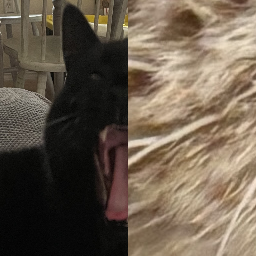

True

In [ ]:


mavis_tmp = mavis[:, 0:int(mavis.shape[1]/2)]
hazel_tmp = hazel[:, int(hazel.shape[1]/2):]

new_img = cv2.hconcat([mavis_tmp, hazel_tmp])

cv2_imshow(new_img)

cv2.imwrite('/content/1-1-c.png', new_img)

In [ ]:
new_img = mavis

for line in range(mavis.shape[0]):
  if line % 2 == 0:
    new_img[line, :] = hazel[line, :]

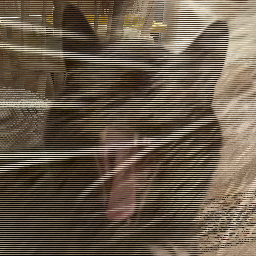

True

In [ ]:
cv2_imshow(new_img)
cv2.imwrite('/content/1-1-d.png', new_img)

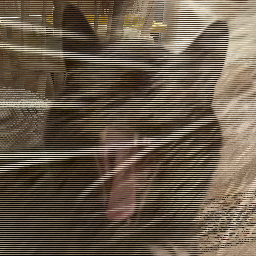

In [ ]:
new_img = mavis

lines = range(mavis.shape[0])[::2]

new_img[lines, :] = hazel[lines, :]

cv2_imshow(new_img)


## 1.2

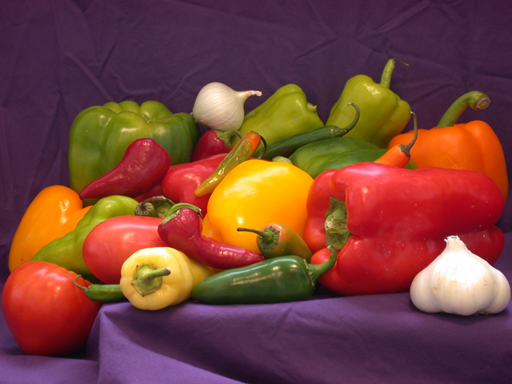

In [ ]:
peppers = cv2.imread("/content/peppers.png")
cv2_imshow(peppers)

In [ ]:
peppers[10,10]

array([0, 0, 0], dtype=uint8)

In [ ]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

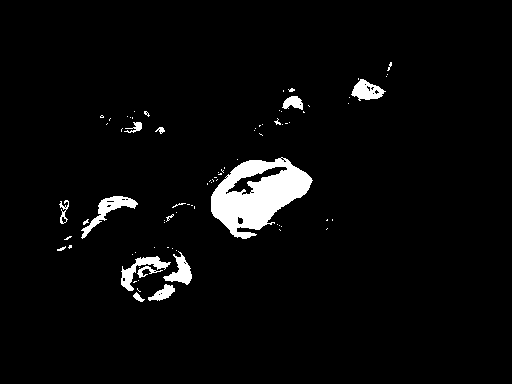

True

In [ ]:
yellow_peppers = cv2.imread("/content/peppers.png")
yellow_peppers[:, :, :] = 0

r_t = 100
g_t = 100
b_t = 100

mask = (peppers[:, :, 0] < b_t) & (peppers[:, :, 1] > 255 - g_t) & (peppers[:, :, 2] > 255 - r_t)

yellow_peppers[mask] = 255

cv2_imshow(yellow_peppers)

cv2.imwrite('/content/1-2-a.png', yellow_peppers)


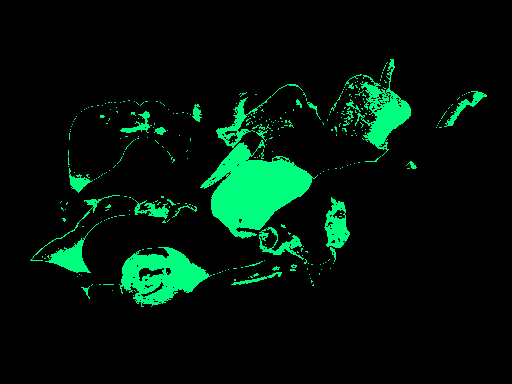

True

In [ ]:
peppers_2 = cv2.cvtColor(peppers, cv2.COLOR_BGR2HSV )

yellow_peppers_2 = cv2.imread("/content/peppers.png")
yellow_peppers_2[:, :, :] = 0

avg_h = 23
h_t = 5
s_t = 40
v_t = 40

mask = (peppers_2[:, :, 0] > avg_h - h_t) & (peppers_2[:, :, 0] < avg_h + h_t) & (peppers_2[:, :, 1] > 100 - s_t) & (peppers_2[:, :, 2] > 100 - v_t)

yellow_peppers_2[mask] = 255

yellow_peppers_2 = cv2.cvtColor(yellow_peppers_2, cv2.COLOR_HSV2BGR )

cv2_imshow(yellow_peppers_2)

cv2.imwrite('/content/1-2-b.png', yellow_peppers_2)


# 2.0

## 2.1

## 2.2

In [ ]:
def translation(x_disp, y_disp):
  # x_disp = -x_disp
  y_disp = -y_disp
  return np.array([[1, 0, x_disp],
                   [0, 1, y_disp],
                   [0, 0, 1]])


def rotation(angle):
  angle = - np.deg2rad(angle)
  return np.array([[np.cos(angle), -np.sin(angle), 0],
                   [np.sin(angle), np.cos(angle), 0],
                   [0, 0, 1]])


def similarity(x_disp, y_disp, angle, scale):
  # x_disp = -x_disp
  y_disp = -y_disp
  scale = 1/scale
  angle = - np.deg2rad(angle)
  return np.array([[scale*np.cos(angle), -scale*np.sin(angle), x_disp],
                   [scale*np.sin(angle), scale*np.cos(angle), y_disp],
                   [0, 0, 1]])

def affine(a, b, c, d, e, f):
  return np.array([[a, b, c],
                   [d, e, f],
                   [0, 0, 1]])

## 2.3

In [ ]:
def imwarp(I, T):

  x, y, _ = I.shape

  center_x = int(x/2)
  center_y = int(y/2)

  J = np.zeros((x,y, 3), np.uint8)

  for row in range(x):
    for col in range(y):

        j_vec = np.array([row-center_x, col-center_y, 1])

        old_vec = np.matmul(T, j_vec)

        x_prime = old_vec.T[0] + center_x
        y_prime = old_vec.T[1] + center_y


        if np.logical_and(x_prime > 0, x_prime < 255) and np.logical_and(y_prime > 0, y_prime < 255):


          # Bilinear interpolation
          x_0 = int(np.floor(x_prime))
          y_0 = int(np.floor(y_prime))

          w1 = (x_0 + 1 - x_prime) * (y_0 + 1 - y_prime)
          w2 = (x_0 + 1 - x_prime) * (y_prime - y_0)
          w3 = (x_prime - x_0) * (y_0 + 1 - y_prime)
          w4 = (x_prime - x_0) * (y_prime - y_0)

          J[row, col] = w1*I[x_0, y_0] + w2*I[x_0, y_0+1] + w3*I[x_0+1, y_0] + w4*I[x_0+1, y_0+1]



  return J

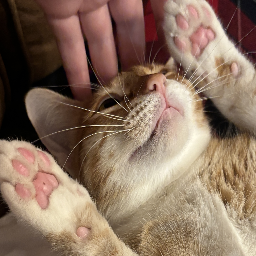

In [ ]:

# hazel = cv2.cvtColor(hazel, cv2.COLOR_BGR2GRAY )
cv2_imshow(hazel)

## 2.4

In [ ]:
hazel = cv2.imread("/content/hazel.jpg")
hazel = cv2.resize(hazel, (256, 256))

new_img = imwarp(hazel, translation(21, 25))

cv2.imwrite('/content/2-4-a.png', new_img)

new_img = imwarp(hazel, translation(-21, 25))
cv2.imwrite('/content/2-4-b.png', new_img)

new_img = imwarp(hazel, translation(21, -25))
cv2.imwrite('/content/2-4-c.png', new_img)

new_img = imwarp(hazel, translation(-21, -25))
cv2.imwrite('/content/2-4-d.png', new_img)


new_img = imwarp(hazel, rotation(30))
cv2.imwrite('/content/2-4-e.png', new_img)

new_img = imwarp(hazel, rotation(-30))
cv2.imwrite('/content/2-4-f.png', new_img)


new_img = imwarp(hazel, similarity(21, 25, 60, 0.5))
cv2.imwrite('/content/2-4-g.png', new_img)


new_img = imwarp(hazel, affine(1, 2, 3, 4, 5, 6))
cv2.imwrite('/content/2-4-h.png', new_img)




True

In [ ]:
hazel = cv2.imread("/content/mavis.jpg")
hazel = cv2.resize(hazel, (256, 256))

new_img = imwarp(hazel, translation(21, 25))

cv2.imwrite('/content/2-4-a2.png', new_img)

new_img = imwarp(hazel, translation(-21, 25))
cv2.imwrite('/content/2-4-b2.png', new_img)

new_img = imwarp(hazel, translation(21, -25))
cv2.imwrite('/content/2-4-c2.png', new_img)

new_img = imwarp(hazel, translation(-21, -25))
cv2.imwrite('/content/2-4-d2.png', new_img)


new_img = imwarp(hazel, rotation(30))
cv2.imwrite('/content/2-4-e2.png', new_img)

new_img = imwarp(hazel, rotation(-30))
cv2.imwrite('/content/2-4-f2.png', new_img)


new_img = imwarp(hazel, similarity(21, 25, 60, 0.5))
cv2.imwrite('/content/2-4-g2.png', new_img)


new_img = imwarp(hazel, affine(1, 2, 3, 4, 5, 6))
cv2.imwrite('/content/2-4-h2.png', new_img)



True

# 3.0

## 3.1

## 3.2

# 4.0

### a.

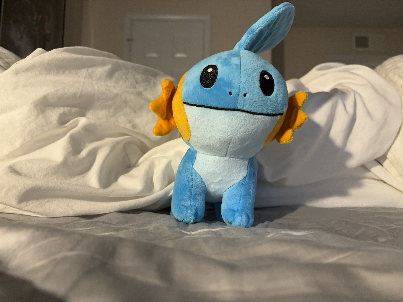

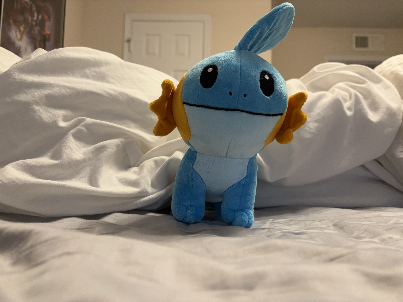

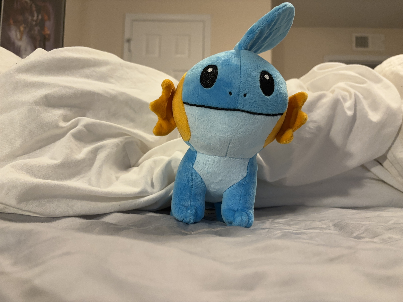

In [ ]:
I1 = cv2.imread("/content/I1.JPG")
I2 = cv2.imread("/content/I2.JPG")
I12 = cv2.imread("/content/I12.JPG")

I1 = cv2.resize(I1, None, fx=0.1, fy=0.1)
I2 = cv2.resize(I2, None, fx=0.1, fy=0.1)
I12 = cv2.resize(I12, None, fx=0.1, fy=0.1)

cv2_imshow(I1)
cv2_imshow(I2)
cv2_imshow(I12)

### b.

In [ ]:
I12_synth = I1/2 + I2/2


D = I12_synth - I12

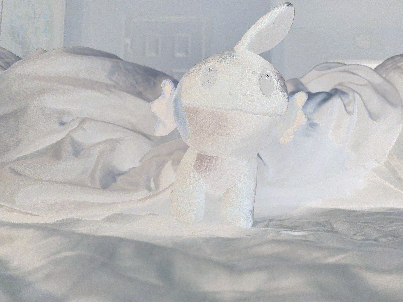

In [ ]:
new_D = 255 * (D - np.min(D))/(np.max(D) - np.min(D))

cv2_imshow(new_D)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### c.

In [ ]:
cv2.imwrite('/content/I1.png', I1)
cv2.imwrite('/content/I2.png', I2)
cv2.imwrite('/content/I12.png', I12)
cv2.imwrite('/content/I12_synth.png', I12_synth)
cv2.imwrite('/content/D.png', new_D)

True

### d.